<a href="https://colab.research.google.com/github/cajohare/HowToMakeAPlot/blob/main/code/VisualClarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visual clarity in plot design

## An example of a plot that has low visual clarity

* labels overlapping plot elements
* annotations misaligned with what they're labelling
* Mixture of linewidths and attributes that are not meaningful 
* Unecessary grid lines adding more visual clutter
* Pre-attentive attributes not used to distinguish types of information

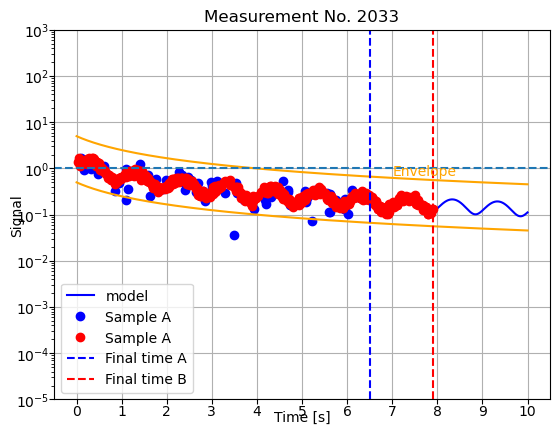

In [1]:
from numpy import *
import matplotlib.pyplot as plt
from numpy import random

plt.style.use('default')


# Making the data for the plot
t = linspace(0,10,10000)
model = lambda t : (1+sin(pi*t+0.5)**2)/(1+t)
tmax_A = 6.5
tmax_B = 7.9
td_A = tmax_A*random.uniform(size=100)
td_B = tmax_B*random.uniform(size=500)
signal_A = model(td_A)+random.normal(loc=0,scale=0.3*model(td_A))
signal_B = model(td_B)+random.normal(loc=0,scale=0.1*model(td_B))

# Plotting data
plt.plot(t,model(t),color='blue',label='model')
plt.plot(td_A,signal_A,'o',color='blue',label='Sample A')
plt.plot(td_B,signal_B,'o',color='red',label='Sample A')
plt.plot(t,5/(1+t),'orange')
plt.plot(t,0.5/(1+t),'orange')
plt.axhline(1,linestyle='--')
plt.axvline(tmax_A,color='blue',linestyle='--',label='Final time A')
plt.axvline(tmax_B,color='red',linestyle='--',label='Final time B')

# Tweaking plot
plt.yscale('log')
plt.grid()
plt.ylabel('Signal',labelpad=-6)
plt.xlabel('Time [s]',labelpad=-6)
plt.title('Measurement No. 2033')
plt.tick_params(pad=0)
plt.xticks(arange(0,11))
plt.ylim(bottom=1e-5,top=1e3)
plt.legend()
plt.text(7,0.7,'Envelope',color='orange')

plt.savefig('../plots/VisualClarity_Bad.pdf',transparent=False,bbox_inches='tight')

# Improved plot

### Just lining everything up, and using visual attributes with intention to convey information, rather than letting it all be a mish-mash

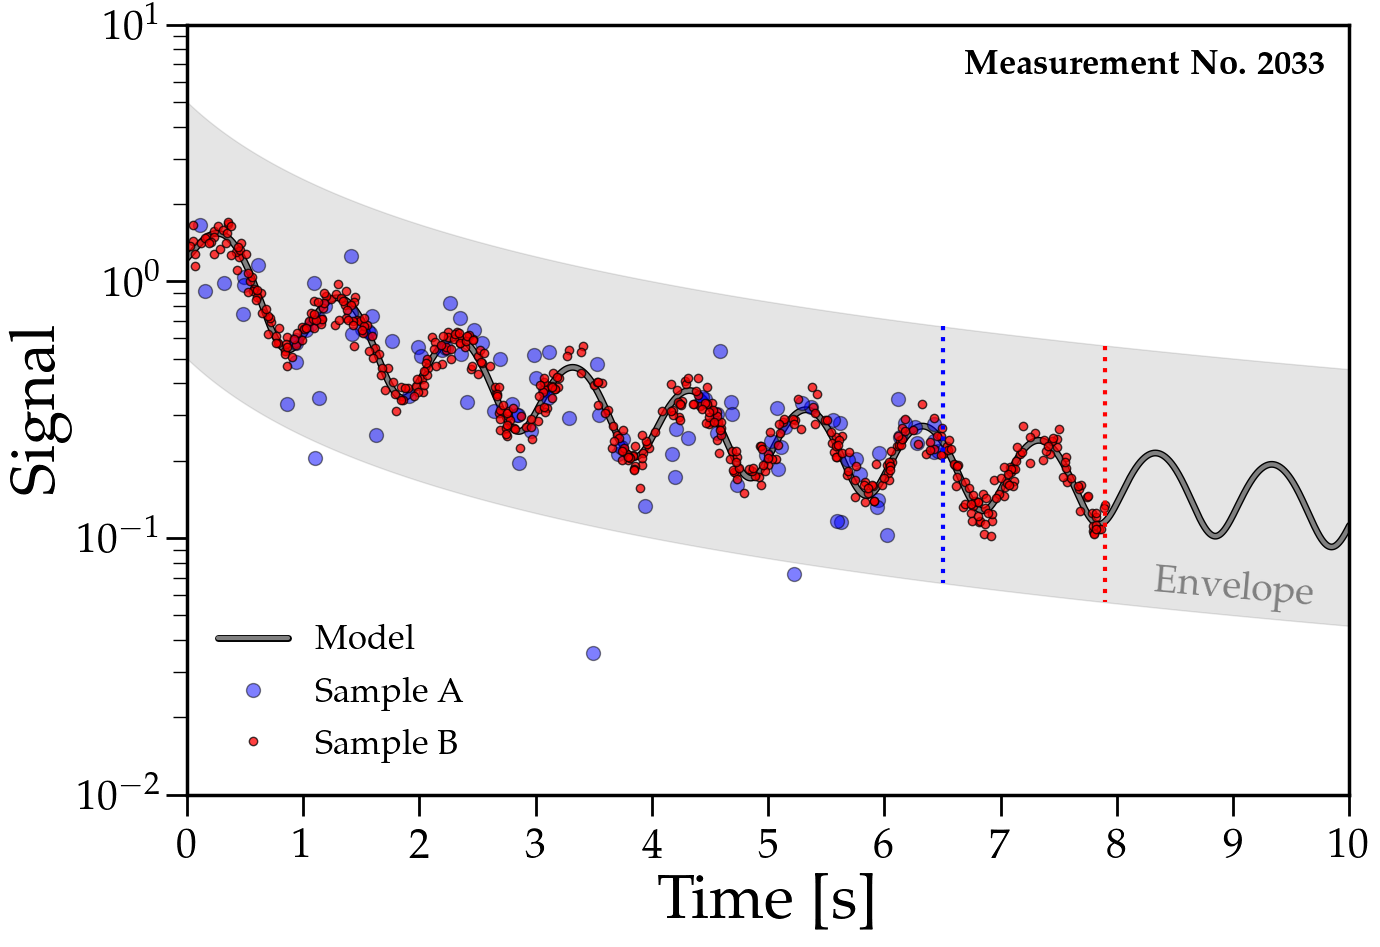

In [2]:
import matplotlib.patheffects as pe

plt.style.use('sty.mplstyle')

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()


# Plotting data
plt.plot(t,model(t),color='gray',label='Model',zorder=1,path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])
plt.plot(td_A,signal_A,'o',color='blue',label='Sample A',markersize=10,mec='k',mew=1,alpha=0.5)
plt.plot(td_B,signal_B,'o',color='red',label='Sample B',mec='k',mew=1,alpha=0.75)
plt.fill_between(t,5/(1+t),y2=0.5/(1+t),color='k',alpha=0.1,zorder=-10)
plt.plot([tmax_A,tmax_A],[5/(1+tmax_A),0.5/(1+tmax_A)],color='blue',linestyle=':',alpha=1)
plt.plot([tmax_B,tmax_B],[5/(1+tmax_B),0.5/(1+tmax_B)],color='red',linestyle=':')

# Tweaking plot appearance
plt.xticks(arange(0,11))
plt.ylim(bottom=1e-2,top=1e1)
plt.xlim(left=0,right=10)
ax.tick_params(which='major',tickdir='out',top=False,right=False)
ax.tick_params(which='minor',tickdir='out',top=False,right=False)

# Labels
plt.yscale('log')
plt.ylabel('Signal')
plt.xlabel('Time [s]')
plt.gcf().text(0.885,0.83,r'{\bf Measurement No. 2033}',ha='right',fontsize=25)
plt.legend(fontsize=25,loc='lower left')
plt.text(8.3,0.055,'Envelope',color='gray',rotation=-5)

plt.savefig('../plots/VisualClarity_Good.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/VisualClarity_Good.png',transparent=False,bbox_inches='tight')